# Прогноз продаж в интернет-магазине

## Описание проекта
Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры.  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Описание данных  
 - Name — название игры  
 - Platform — платформа  
 - Year_of_Release — год выпуска  
 - Genre — жанр игры  
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)  
 - EU_sales — продажи в Европе (миллионы проданных копий)  
 - JP_sales — продажи в Японии (миллионы проданных копий)  
 - Other_sales — продажи в других странах (миллионы проданных копий)  
 - Critic_Score — оценка критиков (максимум 100)  
 - User_Score — оценка пользователей (максимум 10)  
 - Rating — рейтинг от организации ESRB

<a id="1"></a>
## Часть 1. Общая информация

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from statistics import mean
import numpy as np

In [3]:
games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/games.csv')
games = pd.DataFrame(data=games)
games.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id="2"></a>
## Часть 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);  
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
- Обработайте пропуски при необходимости:  
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
- Опишите причины, которые могли привести к пропускам;  
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

<a id="21"></a>
### Приведем названия столбцов к нижнему регистру

In [6]:
games.columns = map(str.lower, games.columns)

<a id="22"></a>
### Обработка пропусков

##### name & Genre              

In [7]:
from functools import partialmethod
import pandas as pd

pd.DataFrame.query = partialmethod(pd.DataFrame.query, engine="python")

In [8]:
games.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
games[games['platform'] == "GEN"]['platform'].count()

29

Игр на приставке GEN представленных в датафрейме и так очень мало, поэтому не буду удалять их. (GEN ~ Sega Genesis или же известная во всем мире как Mega drive)  
Причины пропуска имени и жанра вижу только в ошибке заполнения или парсинга датафрейма

In [10]:
games['name'] = games['name'].fillna('no_name') #заменю на no_name
games['genre'] = games['genre'].fillna('no_genre') #заменю так же на no_genre

##### Year_of_Release    

In [11]:
games.query('year_of_release.isnull()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14252,Swords,Wii,NaN,Fighting,0.03,0.00,0.00,0.00,NaN,tbd,T
8547,Alone in the Dark: The New Nightmare,PS,NaN,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M
5294,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,0.15,0.05,0.14,0.01,NaN,NaN,NaN
12241,Alex Rider: Stormbreaker,DS,NaN,Action,0.06,0.00,0.00,0.00,48.0,6.1,T
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.00,55.0,5.5,T
13609,Battle vs. Chess,PS3,NaN,Misc,0.00,0.03,0.00,0.01,NaN,NaN,T
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,0.00,0.00,0.12,0.00,NaN,NaN,NaN
4959,Silent Hill: Homecoming,PS3,NaN,Action,0.18,0.14,0.00,0.06,71.0,6.9,M
6133,Unreal Championship 2: The Liandri Conflict,XB,NaN,Shooter,0.22,0.05,0.00,0.01,85.0,8.2,M
15704,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN


При таком малом количестве можно просто нагуглить, но я заменю все на -1.   
Искать похожие названия на других платформах и заменять на их значения считаю некорректным, т.к. за частую игры на разных платформах могут выходить в разные года. Или быть юбилейными ремастирангами.

In [12]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

##### critic_score

In [13]:
games.query('critic_score.isnull()').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15498,Airport Simulator,PC,2011.0,Simulation,0.00,0.02,0.00,0.00,NaN,NaN,NaN
12844,Impact Racing,PS,1996.0,Racing,0.03,0.02,0.00,0.00,NaN,NaN,NaN
15432,Spirits and Demons: 5 Game Pack,PC,2015.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN
11626,Resident Evil Zero,XOne,2016.0,Action,0.05,0.02,0.00,0.01,NaN,NaN,NaN
12304,You Don't Know Jack,DS,2011.0,Misc,0.06,0.00,0.00,0.00,NaN,tbd,T
12195,Sherlock Holmes: Crimes & Punishments,PS3,2014.0,Adventure,0.03,0.03,0.00,0.01,NaN,NaN,NaN
11730,Tales of Fandom Vol.2,PS2,2007.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8837,Adventure Time: Explore the Dungeon Because I ...,3DS,2013.0,Action,0.10,0.03,0.00,0.01,NaN,NaN,NaN
16003,Tennis no Oji-Sama: Card Hunter,PS2,2007.0,Strategy,0.00,0.00,0.02,0.00,NaN,NaN,NaN
3242,Beetle Adventure Racing!,N64,1999.0,Racing,0.40,0.20,0.00,0.02,NaN,NaN,NaN


In [14]:
len(games.query('critic_score.isnull()'))*100/len(games)

51.319174394256656

Большая часть игр так и не дошла до рецензии критиков, что не удивительно, до критиков доходят в основном ААА или нашумевшие проекты, удалять такой объем данных нельзя да и заменить невозможно, заменяем на -1, потому что 0 вполне может быть "заслуженной" оценкой.

In [15]:
games['critic_score'] = games['critic_score'].fillna(-1)

##### user_score

In [16]:
games.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [17]:
len(games.query('user_score.isnull()'))*100/len(games)

40.08973975471134

Все зависит от страны составителя рейтинга, например 16712	Haitaka no Psychedelica продавалась только в Японии, поэтому могла бить незамеченная пользователями из других стран.
По тем же причинам что и в рейтинге критиков заменяем на -1

In [18]:
games['user_score'] = games['user_score'].fillna(-1)

##### rating

In [19]:
games.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


In [20]:
len(games.query('rating.isnull()'))*100/len(games)

40.478612025127134

Рейтинг отсутствует на множестве платформ, годов, и жанров. Это могло произойти в следствии многих факторов: ESRB был создан в 1994 и действует в США и Канаде поэтому игры, созданные раньше, или распространяемые в других странах могли не удостоится рейтинга, да и определение рейтинга происходит с подачи издателя, т.е. он может и не присылать заявку на рейтинг. Данных слишком много, чтобы от них избавится. Подобрать значение невозможно. Заменю на "no_rating".

In [21]:
games['rating'] = games['rating'].fillna("no_rating")

<a id="23"></a>
### Преобразуйте данные в нужные типы

In [22]:
games['year_of_release'] = games['year_of_release'].astype('int') # Год выхода не может быть с запятой

In [23]:
# games['user_score'] = games['user_score'].astype('float') вот тут мы упираемся в 'tbd' ставший причиной типа "object"

tbd = to be determined именно так, например в стиме обозначают игры рейтинг которых еще не подсчитан из за малого колличества оценок.

In [24]:
games.loc[games['user_score'] == 'tbd','user_score'] = -1

In [25]:
# Для дальнейших математических операций нам надо будет привести этот столбик к числовому формату
games['user_score'] = games['user_score'].astype('float') 

<a id="24"></a>
### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [26]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales']


In [27]:
games.duplicated().sum() # НА всякий случай проверил дубликаты

0

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">Комментарий студента</h1>

Исправился.
</div>

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>

Ок, в целом предобработка верно сделана. В конце стоило еще раз вывести info, чтоб более наглядно показать итог
</div>

<a id="3"></a>
## Часть 3. Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<a id="31"></a>
### Cколько игр выпускалось в разные годы:

In [29]:
allyear = games.pivot_table(index='year_of_release', values='name', aggfunc='count') # Распределю колличество по годам

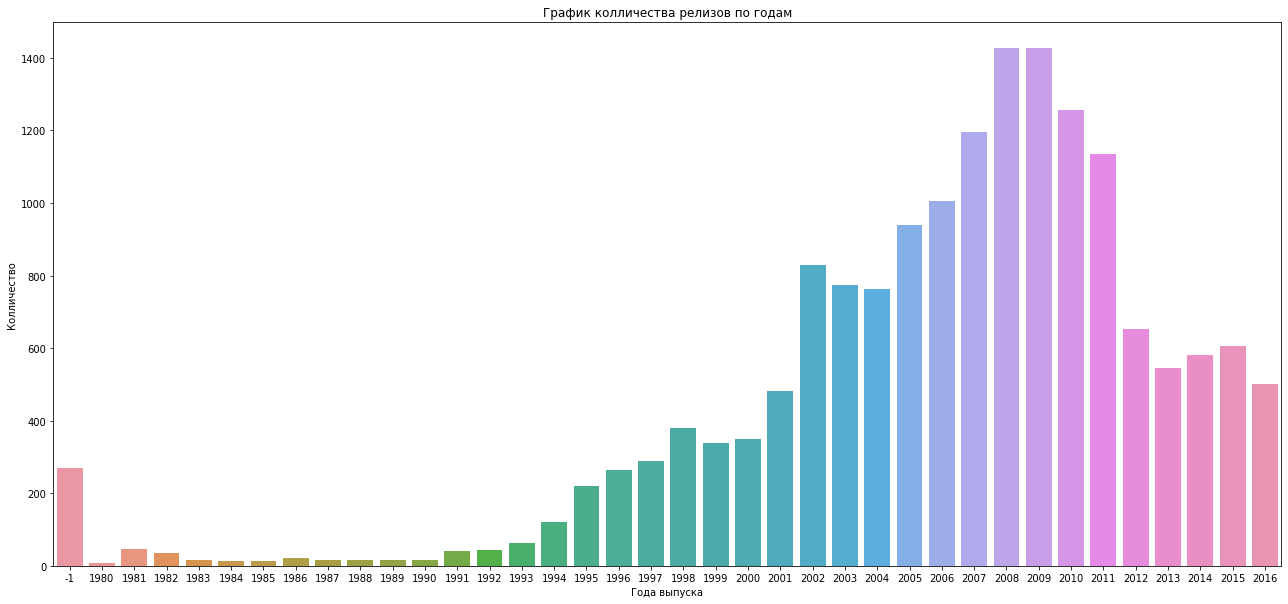

In [30]:
plt.figure(figsize=(22,10))
sns.barplot(x=allyear.index, y="name", data=allyear)
plt.title('График колличества релизов по годам')
plt.xlabel('Года выпуска')
plt.ylabel('Колличество')
plt.show()


Данные до 1994 года могут быть не так интересны для анализа. Спад после 2009 совпадает со становлением android и iOS. Я так же читал на примере российского игродела, что рынок 2000х был перенасыщен, по типу кризиса дот-комов. Когда инвесторы без разбора вкладывались в любой проект.



<a id="32"></a>
### Продажи по платформам по годам

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам

In [65]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,1974.178702,0.263377,0.145060,0.077617,0.047342,33.060844,2.689447,0.486054
std,252.685834,0.813604,0.503339,0.308853,0.186731,36.299555,4.169833,1.413770
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.150000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.430000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,74.090000


#### Дальше небольшой оффтоп не по заданию, нашел ошибку данных, думал, что она могла привести неправильным выводам по взятию актуальных годов. Оказалось нет.

In [32]:
sales_platform = games[games['year_of_release'] != -1].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
sales_platform # нашел явно ошибку данных: платформа DS(Nintendo DS) ни как не могла продаваться в 1985г. Ибо сделана она в 2004 году

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,52.53,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.73,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN,NaN,NaN,44.07,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Решил поискать кто это 
games[(games['platform']=='DS')&(games['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,no_rating,0.02


Это переиздание японских шахмат "Сёги" с платформы NES на DS 2005года, Исправим)


In [34]:
games.loc[15957, 'year_of_release'] = 2005
sales_platform = games[games['year_of_release'] != -1].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

#### Оффтоп закончен

In [35]:
top7 = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(7, 'total_sales')
top7 = list(top7.index)
top7

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA']

In [36]:
sales_platform7 = sales_platform.loc[:, ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA']]

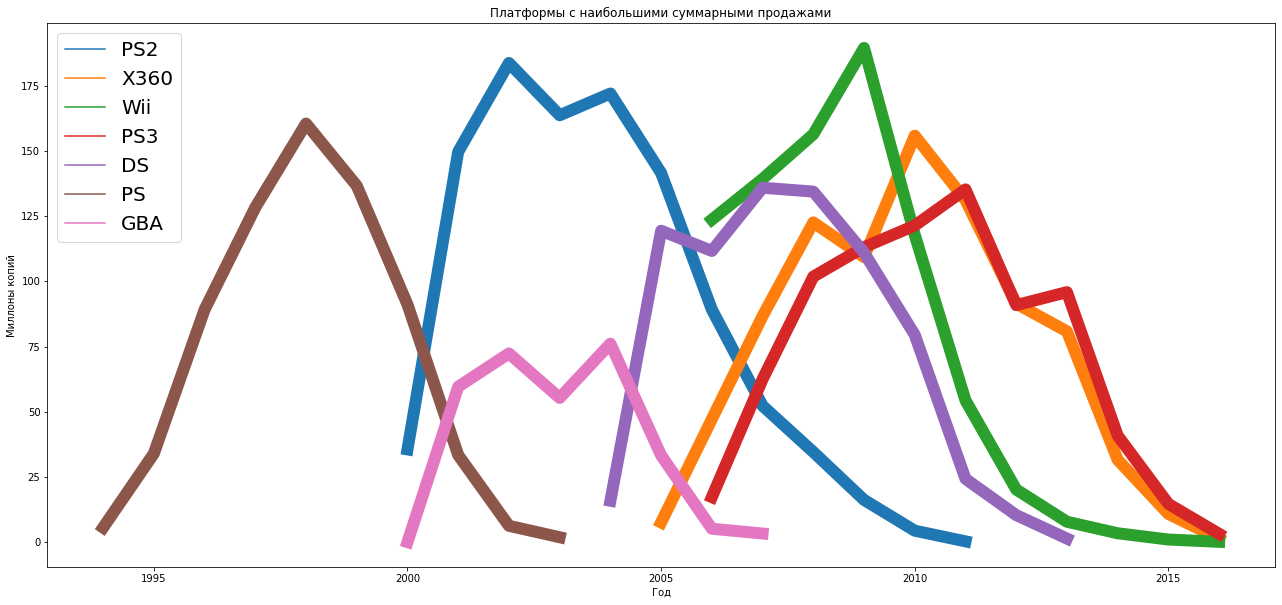

In [37]:
plt.figure(figsize=(22,10))
sns.lineplot(data = sales_platform7, linewidth = 12, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20, bbox_to_anchor=(0, 1))
plt.show()

В каждый период времени были свои популярные платформы. Но период востребованности у всех ограничен.

#### Время жизни платформы

In [38]:
alllife=[]
for platform in sales_platform.columns:
    lst=(sales_platform.index[~sales_platform[platform].isnull()])
    life =lst.max()-lst.min()+1
    alllife.append(life)
mean(alllife)


8

Срок жизни игровой платформы составляет 8 лет. Поэтому в дальнейшем для прогнозирования можно оставить промежуток времени в последние 8 лет.

<a id="33"></a>
### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

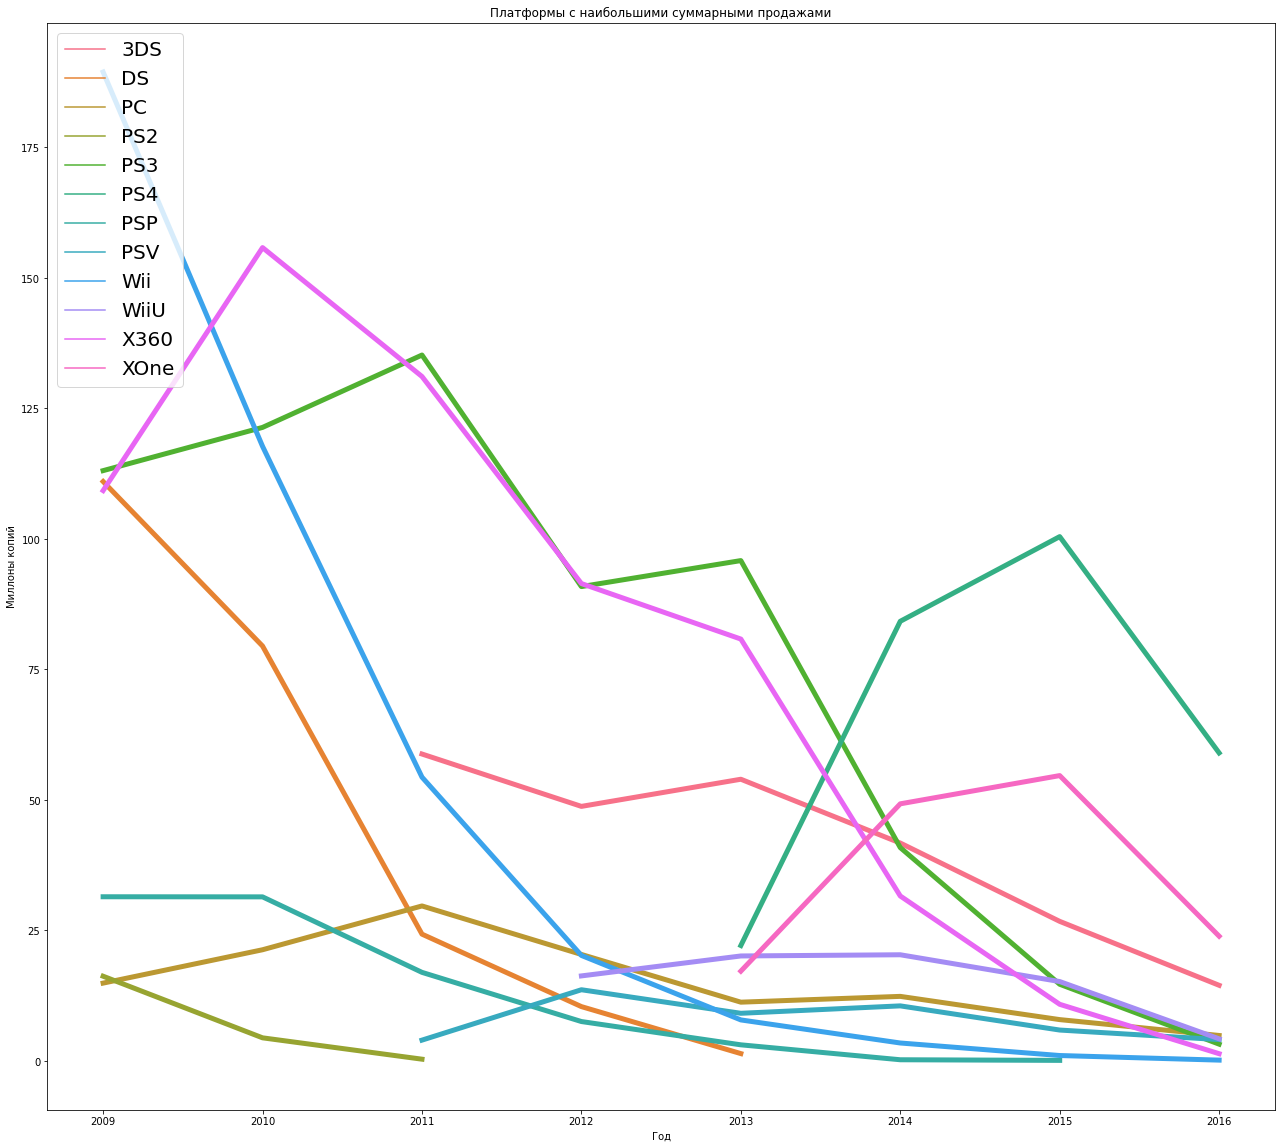

In [39]:
relevantgames = games[games['year_of_release'] > 2008]
relevantplatform = relevantgames.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plt.figure(figsize=(22,20))
sns.lineplot(data = relevantplatform, linewidth = 5, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1))
plt.show()

Как то грязно, сокращу до наиболее популярных
<a id="34"></a>
### Выберите несколько потенциально прибыльных платформ.

In [40]:
relevantgames8 = relevantgames.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(8, 'total_sales')
relevanttop8 = list(relevantgames8.index)
relevanttop8
# Взял 8 чтобы влез PC. Компьютерный гейминг все таки существует по иным правилам чем консоли.

['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']

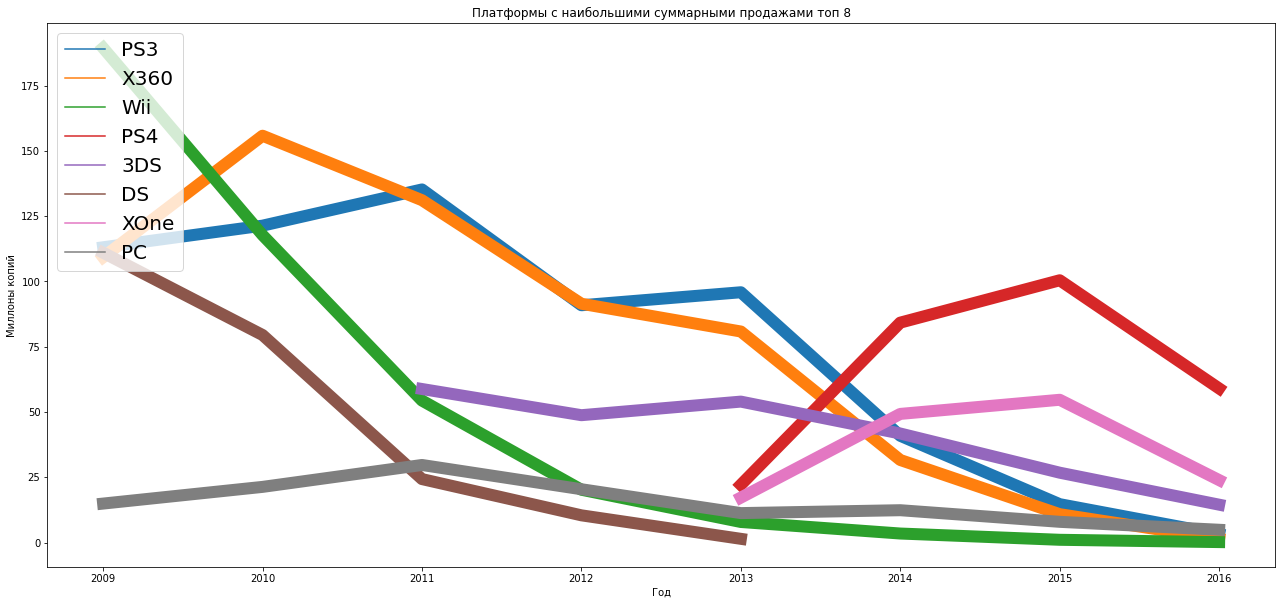

In [41]:
relevantplatform8 = relevantplatform.loc[:, ['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']]
plt.figure(figsize=(22,10))
sns.lineplot(data = relevantplatform8, linewidth = 12, dashes=False)
plt.title('Платформы с наибольшими суммарными продажами топ 8')
plt.xlabel('Год')
plt.ylabel('Миллоны копий')
plt.legend(loc='upper left', fontsize=20,bbox_to_anchor=(0, 1))
plt.show()

На этом графике мы можем заметить, что основные платформы по продажам в последнее время являются самые современные платформы, а именно Xone и PS4. Я считаю, что для более точного дальнейшего анализа 2017 года, необходимо ориентироваться на эти платформы. Поэтому ограничу данные годом начала продаж этих платформ, а именно 2013 год.

In [42]:
relevantgames = relevantgames[relevantgames['year_of_release'] > 2012]


<a id="35"></a>
### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 2.0)

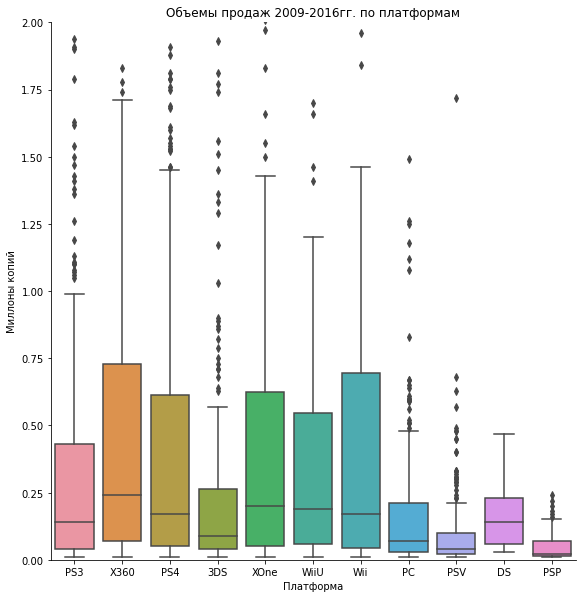

In [43]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=relevantgames, 
            orient='v',
            height=8)
plt.title('Объемы продаж 2009-2016гг. по платформам')
plt.xlabel('Платформа')
plt.ylabel('Миллоны копий')
plt.ylim(0, 2)

Мы видим, что в общей массе продажи не достигают и миллиона копий, но где-то в районе выбросов или даже за гранью графиков есть популярные игры, ААА проекты с миллионами и десятками миллионов продаж. 

<a id="36"></a>
### Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Возьмем две актуальные самые главные конкурирующие платформы PS4 и Хbox One

In [44]:
relevantgames = relevantgames[relevantgames['user_score'] != -1]
relevantgames = relevantgames[relevantgames['critic_score'] != -1]

In [45]:
ps4 = relevantgames.query('platform == "PS4"')
xone = relevantgames.query('platform == "XOne"')


#### Диаграммы рассеяния и корреляция отценок пользователей и продаж PS4 И Xbox One

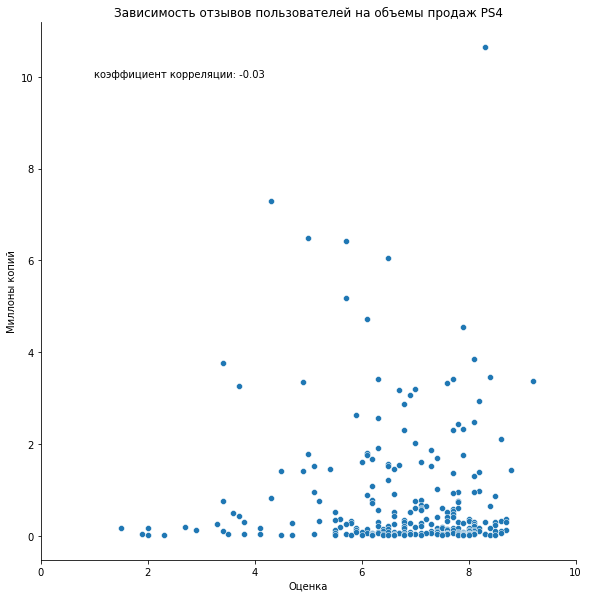

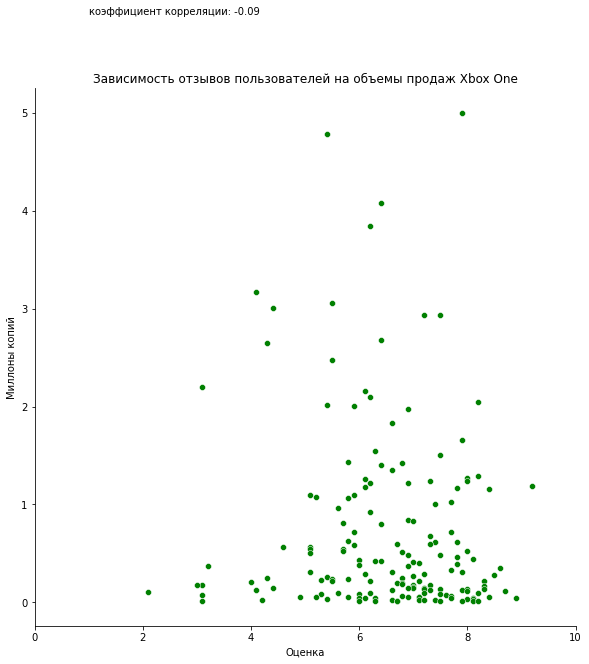

In [46]:
sns.relplot(data=ps4, 
            x='user_score', 
            y='total_sales',
            height=8)
plt.title('Зависимость отзывов пользователей на объемы продаж PS4')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 10)
plt.text(1, 10, 'коэффициент корреляции: ' + str(round(ps4['user_score'].corr(ps4['total_sales']), 2)))
plt.show()

sns.relplot(data=xone, 
            x='user_score', 
            y='total_sales',
            height=8,
            color='green')
plt.title('Зависимость отзывов пользователей на объемы продаж Xbox One')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 10)
plt.text(1, 6, 'коэффициент корреляции: ' + str(round(xone['user_score'].corr(xone['total_sales']), 2)))
plt.show()

#### Диаграммы рассеяния и корреляция отценок критиков и продаж PS4 И Xbox One

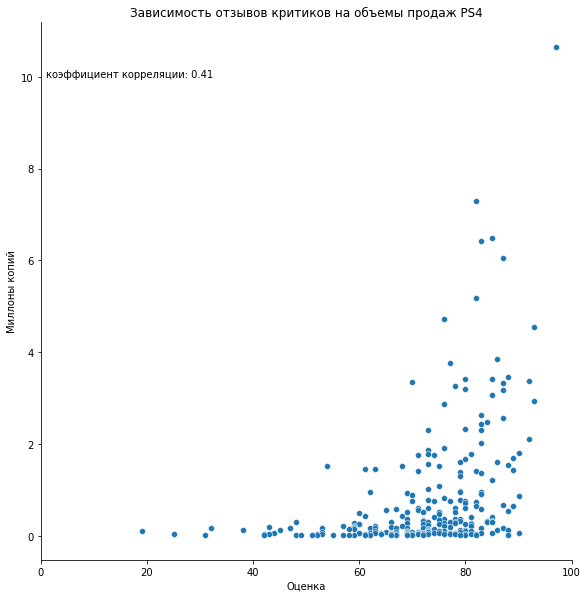

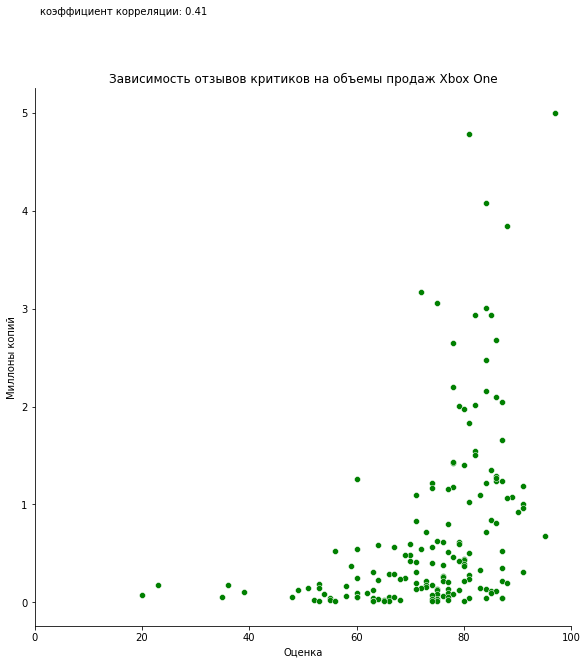

In [47]:
sns.relplot(data=ps4, 
            x='critic_score', 
            y='total_sales',
            height=8)
plt.title('Зависимость отзывов критиков на объемы продаж PS4')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 100)
plt.text(1, 10, 'коэффициент корреляции: ' + str(round(ps4['critic_score'].corr(ps4['total_sales']), 2)))
plt.show()
sns.relplot(data=xone, 
            x='critic_score', 
            y='total_sales',
            height=8,
            color='green')
plt.title('Зависимость отзывов критиков на объемы продаж Xbox One')
plt.xlabel('Оценка')
plt.ylabel('Миллоны копий')
plt.xlim(0, 100)
plt.text(1, 6, 'коэффициент корреляции: ' + str(round(xone['critic_score'].corr(xone['total_sales']), 2)))
plt.show()

Взаимосвязи между оценками пользователей и продажами нет.  
Чуть больше взаимосвязь между оценками критиков и продажами есть, но не большая.
Из данных графиком можно сделать вывод что игры с большими продажами имели высокие оценки критиков. Но не все игры с высокой оценкой критиков имели высокие продажи.
Предположу, что цифры продаж в первую очередь зависят от хорошей рекламы. Поэтому пользователи бывали разочарованы получившимся продуктом. А вот критикам всегда все нравится (в последнее время было много скандалов по этому поводу в игрожуре)

<a id="37"></a>
### Соотнесите выводы с продажами игр на других платформах

In [48]:
for plt in ['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']:
    platf = relevantgames.query("platform == @plt and (user_score != -1) and (critic_score != -1)")
    crr = round(platf['critic_score'].corr(platf['total_sales']), 2)
    print('Корреляция отценок критиков к продажам', plt, crr)
for plt in ['PS3', 'X360', 'Wii', 'PS4', '3DS', 'DS', 'XOne', 'PC']:
    platf = relevantgames.query("platform == @plt and (user_score != -1) and (critic_score != -1)")
    crr = round(platf['user_score'].corr(platf['total_sales']), 2)
    print('Корреляция отценок пользователей к продажам', plt, crr)

Корреляция отценок критиков к продажам PS3 0.34
Корреляция отценок критиков к продажам X360 0.35
Корреляция отценок критиков к продажам Wii nan
Корреляция отценок критиков к продажам PS4 0.41
Корреляция отценок критиков к продажам 3DS 0.34
Корреляция отценок критиков к продажам DS nan
Корреляция отценок критиков к продажам XOne 0.41
Корреляция отценок критиков к продажам PC 0.2
Корреляция отценок пользователей к продажам PS3 0.02
Корреляция отценок пользователей к продажам X360 -0.01
Корреляция отценок пользователей к продажам Wii nan
Корреляция отценок пользователей к продажам PS4 -0.03
Корреляция отценок пользователей к продажам 3DS 0.27
Корреляция отценок пользователей к продажам DS nan
Корреляция отценок пользователей к продажам XOne -0.09
Корреляция отценок пользователей к продажам PC -0.11


По всем платформам сохраняется отсутствие связи оценок пользователей к продажам и небольшая взаимосвязь оценок критиков к продажам.
Наибольшая корреляция оценок критиков к продажам современных консолей, внимание к консолям предыдущего поколения снижено. Консоли непопулярные в Европе и Америке, как мы в дальнейшем узнали и вовсе критики обходят стороной


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера</h1>

Ок, технически корреляция рассчитана и проанализирована верно, только убери -1 и поправь выводы
</div>

<a id="38"></a>
### Общее распределение игр по жанрам. 

In [49]:
genre = relevantgames.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
genre.columns = ['sum', 'count']
genre.sort_values(by='sum', ascending=False)

,sum,count
genre,,
Action,202.67,309
Shooter,150.35,132
Sports,99.65,110
Role-Playing,54.80,127
Racing,30.32,59
Platform,28.91,50
Misc,17.61,42
Fighting,15.64,42
Simulation,11.20,26


[Text(0, 0.5, '')]

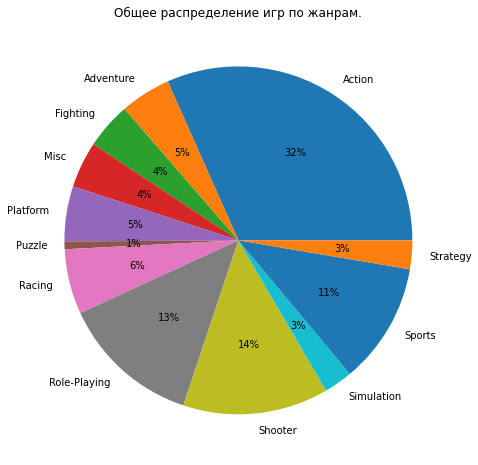

In [50]:
genre.plot(kind='pie',y="count", autopct='%1.0f%%', legend=False, title = "Общее распределение игр по жанрам.", figsize=(8, 8)).set(ylabel='')

Безусловный лидер Action, наибольший интерес пользователей, но и большая конкуренция издателей, а вот пазлы и стратеги популярностью не пользуются. Объемы продаж относительно количества выпущенных игр тоже достаточно низкие.


<a id="4"></a>
## Часть 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id="41"></a>
### Самые популярные платформы (топ-5).

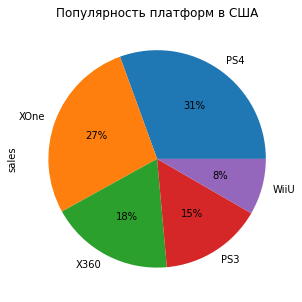

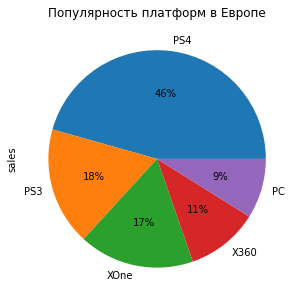

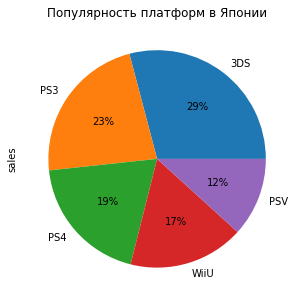

In [51]:
na_sales = relevantgames.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.columns = ['sales']
na_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в США", figsize=(5, 5))

eu_sales = relevantgames.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.columns = ['sales']
eu_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Европе", figsize=(5, 5))

jp_sales = relevantgames.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.columns = ['sales']
jp_sales.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность платформ в Японии", figsize=(5, 5))


В каждом регионе есть свои лидеры по популярности продаж игр среди платформ. Это может быть связанно с нацеленностью на внутренний рынок как у Xbox в США, PS3 в Японии. В целом платформа PS4 наиболее популярная в мире. В Европе и США платформы распределены похоже, в Европе сильны позиции ПК гейминга, а в америке пользуются спросом карманно/универсальные WiiU  . А вот культурные особенности Японцев поражают. Я читал что у них культ карманных приставок, но не думал, что настолько.

<a id="41"></a>
### Самые популярные жанры (топ-5).

[Text(0, 0.5, '')]

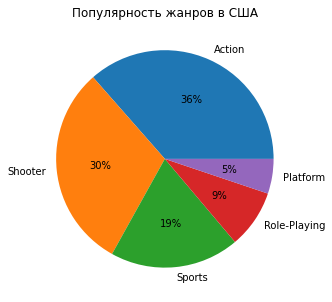

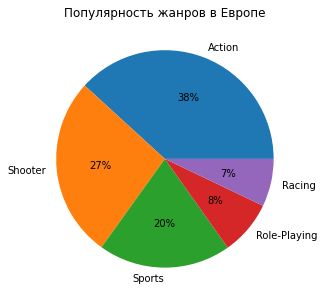

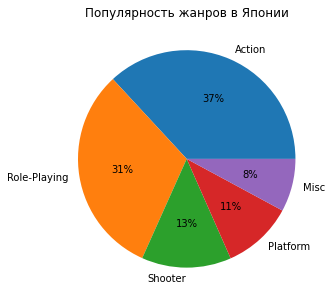

In [64]:
na_genres = relevantgames.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres.columns = ['sales']
na_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в США", figsize=(5, 5)).set(ylabel='')

eu_genres = relevantgames.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres.columns = ['sales']
eu_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в Европе", figsize=(5, 5)).set(ylabel='')

jp_genres = relevantgames.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres.columns = ['sales']
jp_genres.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Популярность жанров в Японии", figsize=(5, 5)).set(ylabel='')




Как мы и узнали ранее жанр Action самый популярный и заслуженно занимает первые строчки в рейтингах. В целом распределение жанров по США и Европе мало различается в связи с похожими культурными традициями и распространённостью платформ. А вот Японский рынок опят несет отличия. Шутеры пользуются меньше популярность чем РПГ (Скорее даже знамениетые японские MMORPG)

<a id="43"></a>
### Влияние рейтинга ESRB на продажи в отдельном регионе

[Text(0, 0.5, '')]

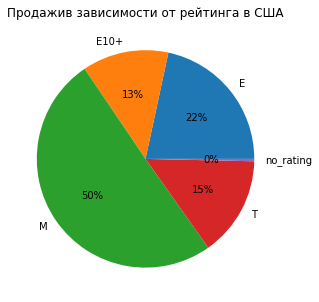

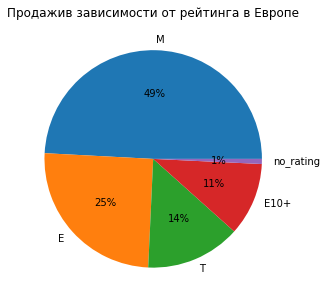

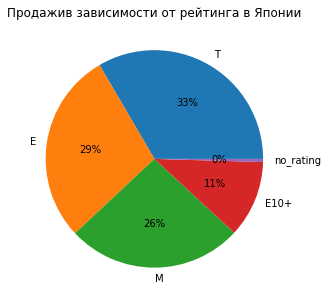

In [53]:
na_rating = relevantgames.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.columns = ['sales']
na_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажив зависимости от рейтинга в США", figsize=(5, 5)).set(ylabel='')

eu_ratings = relevantgames.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_ratings.columns = ['sales']
eu_ratings.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажив зависимости от рейтинга в Европе", figsize=(5, 5)).set(ylabel='')

jp_rating = relevantgames.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_rating.columns = ['sales']
jp_rating.plot(kind='pie',y="sales", autopct='%1.0f%%', legend=False, title = "Продажив зависимости от рейтинга в Японии", figsize=(5, 5)).set(ylabel='')




Самые зрелищные и реалистичные игры: экшены и шутеры получают взрослые рейтинги что может объяснить высокие продажи игры взрослых рейтингов в США и Европе.  
Дети любят компьютерные игры. Маленьким детям сложно играть во взрослые игры, поэтому для них приходится делать свой контент. Что может объяснить суммарно большой процент детских игр.
Игры для тинейджеров менее популярны так как ограничены по многим параметрам. А подростки могут спокойно покупать игры со взрослыми ограничениями.  

Как пишет википедия: В онлайн-играх, содержимое которых может модифицироваться пользователями (например, диалоги, карты, модели персонажей), используется замечание «Game Experience May Change During Online Play», которое предупреждает покупателей о том, что пользовательский контент в игре не проходил рецензирования ESRB.  
Этим можно объяснить наличие игр без рейтинга, хоть и в малых количествах.

Большое распространение рейтинга Т на Японском рынке можно попробовать объяснить большим распространением стиля Аниме (не реалистичная кровь и насилие), но с уверенностью утверждать это не могу.



<a id="5"></a>
## Часть 5. Проверка гипотезы

<a id="51"></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза H₀:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

- Средние пользовательские рейтинги платформ Xbox One и PC различаются.  

α=5% стандартный уровень, так как у нас очень много пропусков данных, есть риск ошибочно отвергнуть гипотизу.


In [54]:
xone = relevantgames.query('platform == "XOne"')['user_score']
pc = relevantgames.query('platform == "PC"')['user_score']

In [55]:
print(np.var(xone,ddof=1))
print(np.var(pc,ddof=1))

1.7963991130820411
2.9324448428019863


In [56]:
print(xone.mean())
print(pc.mean())

6.538181818181819
6.302027027027026


дисперсии выборок не равны equal_var==False

In [57]:
alpha = 0.01
results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы и это совпадение не случайны.

<a id="52"></a>
### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H₀:

-  средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

-  средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются.  

α=5% стандартный уровень, так как у нас очень много пропусков данных, есть риск ошибочно отвергнуть гипотизу.


In [58]:
action = relevantgames.query('genre == "Action"')['user_score']
sports = relevantgames.query('genre == "Sports"')['user_score']


In [59]:
print(action.mean())
print(sports.mean())

6.936245954692556
5.665454545454544


In [60]:
print(np.var(action,ddof=1))
print(np.var(sports,ddof=1))

1.6462144328163717
2.1316396997497913


Дисперсии выборок не равны equal_var==False

In [62]:

alpha = 0.05
results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports различаются, и различие не случайно.

<a id="6"></a>
## Часть 6. Общий вывод

1. При планировании кампании на 2017-й год необходимо ориентироваться на игровые платформы PS4 и XBox One.  
А игра должна быть в жанре Action или Shooter. Оба этих пункта дадут захват наибольшей аудитории и возможность (не гарантированной) максимальных прибылей.  
Если же вдруг вашей целью стоит японский рынок, то точно надо ориентироваться на карманные консоли и делать Role-Playing(RPG).  

2. Продавать игры лучше всего с максимальной реалистичностью, рейтинга M (игры без рейтинга тоже могут частично сюда относиться). 
Так же хорошее потребление у детских игр. Не стоит рассчитывать на подростковые игры. 

3. Оценки пользователей появляются после такого как они уже приобретают игры, поэтому на продажи они влияют опосредованно, в очень малой степени.
Чуть больше влияние оценки критиков. Зачастую игры они получают до релиза, плюс у них есть влияние на аудиторию. Но оценки критиков бывают не совпадают с оценками игроков (влияние маркетингового бюджета)  

